In [1]:
import numpy as np
import scipy.stats as stats

def p_value(sigma):
  return (1-stats.norm.cdf(sigma))

def exam(N): # An examination assuming perfect gaussian
  return p_value( np.random.randn(N) )

Nbins = 10**4
M = 1000

np.random.seed(0)
p_value_set = exam(Nbins*M)

np.random.seed(0)
p_value_min_set = np.array([np.min(exam(Nbins))])
for i in range(M-1):
  p_value_min_set = np.append(p_value_min_set, [np.min(exam(Nbins))])


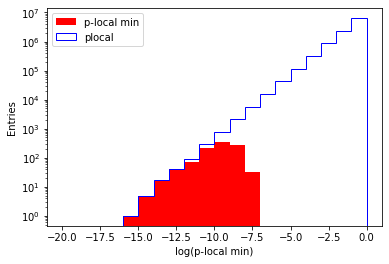

In [2]:
import matplotlib.pyplot as plt

plt.hist(np.log(p_value_min_set), bins=20, range=(-20, 0), histtype='bar', color='red', label='p-local min')
plt.title('')
plt.xlabel('log(p-local min)')
plt.ylabel('Entries')
#plt.grid() 
#plt.xscale('log')
plt.yscale('log')

plt.hist(np.log(p_value_set), bins=20, range=(-20, 0), histtype='step', color='blue', label='plocal')

plt.legend(loc='upper left')
plt.show()

p shape = (1000,)
p shape = (10000000,)


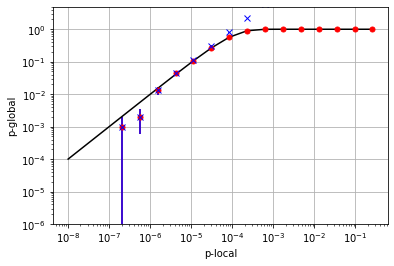

In [11]:
def make_plot_data(p):
  print(f'p shape = {p.shape}')
  #print(f'p = {p}')
  x = np.array([10**-8])
  n = 1.0*len(np.where(p<x[0])[0])
  #print(f'where(p<x[0]) = {np.where(p<x[0])} --> (array of indices)')
  #print(f'n = {n}')
  y = n/M
  ye = np.sqrt(n)/M
  while (x[-1]<0.1): 
    xx = x[-1]*2.73
    n = 1.0*len(np.where(p<xx)[0])
    #print(f'where(p<x[0]) = {np.where(p<xx)}')
    #print(f'n = {n}')
    yy = n/M
    yye = np.sqrt(n)/M
    x = np.append(x, xx)
    y = np.append(y, yy)
    ye = np.append(ye, yye)
    pass
  xe = np.array([0.0]*len(x))
  return (x, y, xe, ye)

(x,y,xe,ye) = make_plot_data(p_value_min_set)

# Theory of p_local(x) v.s. p_global(yy)
yy = 1 - (1-x)**Nbins
plt.plot(x, yy, color='black') 
plt.xlabel('p-local')
plt.ylabel('p-global')
plt.xscale('log')
plt.yscale('log')
#plt.xlim(10**-10, 10**0)
plt.ylim(Nbins*10**-10, 5*10**0)
#  p_local_min probablity method: probablity of p_local_min(x) in M samples v.s. p_global(y)
plt.errorbar(x, y, yerr = ye, xerr = xe, capsize=0, fmt='o', markersize=5, ecolor='red', markeredgecolor = "red", color='red')

# m/M method: p_local(x) v.s. p_global(y)
(x,y,xe,ye) = make_plot_data(p_value_set)
plt.errorbar(x, y, yerr = ye, xerr = xe, capsize=0, fmt='x', markersize=6, ecolor='blue', markeredgecolor = "blue", color='blue')

plt.grid()
plt.show()

黒線が　p_global = 1 - (1-p_local)^N
赤点がp_local^min で作ったMC分布からの p_global
青点がp_localで作ったMC分布からのp_global
２つのMCのrandom seedは同じにした。

- 左下のtailで、赤と青の違いはない
- p_localが大きい部分で、青点はunphysical regionを返すため、p_global=1付近にバイアスが見られる
- 一方、赤点にはp_global=1付近にバイアスがない（しかも、p_global <<1でも青点と違いもない）

結論：p_local_minでやれば良い